# **Prep: Missing Data**

---



## **Detecting**

In [1]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.head(10)

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
0,Bulbasaur,grass,poison,6.9,45,49,49,45,1,0
1,Ivysaur,grass,poison,13.0,60,62,63,60,1,0
2,Venusaur,grass,poison,100.0,80,100,123,80,1,0
3,Charmander,fire,NaN,8.5,39,52,43,65,1,0
4,Charmeleon,fire,NaN,19.0,58,64,58,80,1,0
5,Charizard,fire,flying,90.5,78,104,78,100,1,0
6,Squirtle,water,NaN,9.0,44,48,65,43,1,0
7,Wartortle,water,NaN,22.5,59,63,80,58,1,0
8,Blastoise,water,NaN,85.5,79,103,120,78,1,0
9,Caterpie,bug,NaN,2.9,45,30,35,45,1,0


In [2]:
print(df.isnull().sum())        # Gives you the missing values for each column
print(df.isnull().sum().sum())  # Gives you the missing values for the whole DataFrame

name              0
type1             0
type2           384
weight_kg        20
hp                0
attack            0
defense           0
speed             0
generation        0
is_legendary      0
dtype: int64
404


## **Dropping Rows or Columns**

The easiest way to avoid issues with missing data is to simply drop rows with missing data. However, this could significantly decrease the dataset as a whole, which hurts your analysis, especially if some of your variables still have some solid information. 

In [3]:
df = df.dropna()
print(df.isnull().sum())
df.shape

name            0
type1           0
type2           0
weight_kg       0
hp              0
attack          0
defense         0
speed           0
generation      0
is_legendary    0
dtype: int64


(398, 10)

Sometimes it may be helpful just to drop columns with missing values, if there are only a few features. However, you may have some important information in columns that simply have only a small portion of missing values. You would be completely ignoring these variables in your analysis.

In [4]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')

df = df.dropna(axis=1)
print(df.isnull().sum())
df.shape

name            0
type1           0
hp              0
attack          0
defense         0
speed           0
generation      0
is_legendary    0
dtype: int64


(801, 8)

One good option to avoid both options is to only drop specific columns. THEN, you could potentially drop rows with missing values in other columns if necessary.

In [5]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')

df.drop(columns=['type2'], inplace=True)
print(df.isnull().sum())
df.shape

name             0
type1            0
weight_kg       20
hp               0
attack           0
defense          0
speed            0
generation       0
is_legendary     0
dtype: int64


(801, 9)

## **Simple Replacement: Mean, Mode, Value**

Instead of simply dropping rows or columns, you can replace missing values with the mean or mode.

However, this is not a good option, but is a potential option if most of the values are close to the mean or mode. Think of some reasons when this could be helpful, and also consider some issues that can occur from implementing this method.

In [6]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.fillna(value={'type2': 'normal'}, inplace=True)
df.head()

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
0,Bulbasaur,grass,poison,6.9,45,49,49,45,1,0
1,Ivysaur,grass,poison,13.0,60,62,63,60,1,0
2,Venusaur,grass,poison,100.0,80,100,123,80,1,0
3,Charmander,fire,normal,8.5,39,52,43,65,1,0
4,Charmeleon,fire,normal,19.0,58,64,58,80,1,0


In [7]:
df.fillna(value={'weight_kg': round(df.weight_kg.mean(), 1)}, inplace=True)
# Or, substitute mean with median to get a value that is less biased by outliers
df = df[df['type2'] == 'dark'].sort_values('defense').head(5)
df.head()

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
317,Carvanha,water,dark,20.8,45,90,20,65,3,0
18,Rattata,normal,dark,61.4,30,56,35,72,1,0
51,Meowth,normal,dark,61.4,40,35,35,90,1,0
550,Sandile,ground,dark,15.2,50,72,35,65,5,0
273,Nuzleaf,grass,dark,28.0,70,70,40,60,3,0


In [8]:
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')

# Before mean-replacement:
print(df.weight_kg.std())

# Mean replacement:
df.fillna(value={'weight_kg': round(df.weight_kg.mean(), 1)}, inplace=True)

# After mean-replacement:
print(df.weight_kg.std())

109.35476585346377
107.97917950317911


## **Impute/Interploate**

### **Simple**

In [9]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df = df[df['type2'] == 'dark'].sort_values('defense').head(5)
df

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
317,Carvanha,water,dark,20.8,45,90,20,65,3,0
18,Rattata,normal,dark,NaN,30,56,35,72,1,0
51,Meowth,normal,dark,NaN,40,35,35,90,1,0
550,Sandile,ground,dark,15.2,50,72,35,65,5,0
273,Nuzleaf,grass,dark,28.0,70,70,40,60,3,0


Interpolate() is a nice function that calculates missing values from the surrounding values. However, this works well because the values are SORTED BY defense FIRST, assuming there is a strong correlation between defense and weight_kg.

Think of weight_kg and defense as related by a regression line. Based on defense, weight_kg should change accordingly.

In [10]:
df = df.interpolate().round(1)     # (20.8 - 15.2) / 3 = 1.87, then subtrack 1.87 from each previous value: 20.8, 28.9, 17.1, 15.2
df

C:\Users\Kotori\AppData\Local\Temp\ipykernel_14648\2089494354.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().round(1)     # (20.8 - 15.2) / 3 = 1.87, then subtrack 1.87 from each previous value: 20.8, 28.9, 17.1, 15.2


,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
317,Carvanha,water,dark,20.8,45,90,20,65,3,0
18,Rattata,normal,dark,18.9,30,56,35,72,1,0
51,Meowth,normal,dark,17.1,40,35,35,90,1,0
550,Sandile,ground,dark,15.2,50,72,35,65,5,0
273,Nuzleaf,grass,dark,28.0,70,70,40,60,3,0


In [11]:
# Step 1: Identify the feature with the strongest correlation with weight_kg, which is hp or defense
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.corr()

ValueError: could not convert string to float: 'Bulbasaur'

In [ ]:
# Step 2: Sort the DataFrame on that feature (hp)
df = df.sort_values('hp')
df.head(5)

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
291,Shedinja,bug,ghost,1.2,1,90,45,40,3,0
49,Diglett,ground,ground,NaN,10,55,30,90,1,0
438,Mime Jr.,psychic,fairy,13.0,20,25,45,60,4,0
212,Shuckle,bug,rock,20.5,20,10,230,5,2,0
348,Feebas,water,NaN,7.4,20,15,20,80,3,0


In [ ]:
# Step 3: Interpolate a linear value on just the feature of interest with missing data (weight_kg)
df['weight_kg'].interpolate(inplace=True)
df.head(5) # Show the results

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
291,Shedinja,bug,ghost,1.2,1,90,45,40,3,0
49,Diglett,ground,ground,7.1,10,55,30,90,1,0
438,Mime Jr.,psychic,fairy,13.0,20,25,45,60,4,0
212,Shuckle,bug,rock,20.5,20,10,230,5,2,0
348,Feebas,water,NaN,7.4,20,15,20,80,3,0


Check stats such as the correlation coefficient to see if there is any significant change to the data.

### **Univariate Prediction**

Even better: use a regression model (y = mx + b) to predict weight_kg based on hp!

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.dropna(inplace=True)
np.corrcoef(df.weight_kg, df.hp)[0][1]

0.5025841253432343

In [ ]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df = df[df['type2'] == 'dark'].sort_values('defense').head(5)
df

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
317,Carvanha,water,dark,20.8,45,90,20,65,3,0
18,Rattata,normal,dark,NaN,30,56,35,72,1,0
51,Meowth,normal,dark,NaN,40,35,35,90,1,0
550,Sandile,ground,dark,15.2,50,72,35,65,5,0
273,Nuzleaf,grass,dark,28.0,70,70,40,60,3,0


In [ ]:
import pandas as pd
from scipy import stats
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')

# Step 1: Remove any records that have missing values only for the two columns we need
#         Be sure to put this in a new DataFrame so that we can still fill in values 
df_regression = df.dropna(subset=['weight_kg', 'hp'])

# Step 2: Calculate the regression line: y = m(x) + b
m, b, r, p, err = stats.linregress(df_regression.hp, df_regression.weight_kg)

print(m)
print(b)

1.757056283819094
-60.11974981773389


In [ ]:
# Step 3: Loop through the original DataFrame with missing values and apply the regression formula 
df = df.copy()
for i, value in enumerate(df.weight_kg.values):
  if not pd.notnull(value): # use notnull() to check an individual value
    df.at[i, 'weight_kg'] = round((m * df['hp'][i]) + b, 2)

df[df['type2'] == 'dark'].sort_values('defense').head(5)

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
317,Carvanha,water,dark,20.80,45,90,20,65,3,0
18,Rattata,normal,dark,-7.41,30,56,35,72,1,0
51,Meowth,normal,dark,10.16,40,35,35,90,1,0
550,Sandile,ground,dark,15.20,50,72,35,65,5,0
273,Nuzleaf,grass,dark,28.00,70,70,40,60,3,0


In [ ]:
import numpy as np
np.corrcoef(df.weight_kg, df.hp)[0][1]

0.43157694860466583

In [ ]:
# For this function, pass in the entire dataframe and every numeric column will have missing values
# filled using a simple regression equation based on the most correlated feature. Or, pass in a 
# column name and have just that column filled in
def missing_data_regression(df, column=None):
  import pandas as pd
  from scipy import stats
  from random import seed, gauss

  for col_y in df:                                        # for each column in df to fill
    if column != None:                                    # If they only want to fill one column, then...
      if col_y != column:                                 # ...if it's not the one column they want to fill, then...
        continue                                          # ...skip this loop
    if df[col_y].isnull().sum() > 0:                      # if there is missing data to fill
      if pd.api.types.is_numeric_dtype(df[col_y]):        # and if that column is numeric
        r_list = df.corr()[col_y].abs()                   # create a correlation matrix for just the col_y feature; get absolute values to eliminate sign (+/-)
        r_list.sort_values(inplace=True, ascending=False) # sort the list descending (we want the second item in the list because the first is itself where r = 1.0)

        col_x = r_list.index[1] # Store the index name of the highest correlation

        # Create a new df with missing values of y and x dropped
        clean_df = df.copy()
        clean_df.dropna(subset=[col_y, col_x], inplace=True)

        # Calculate the regression line: y = m(x) + b
        m, b, r, p, err = stats.linregress(clean_df[col_x], clean_df[col_y])

        # Stochastic regression formula: y = m(x) + b + err  <-err is the average residual from the real plot to the regression line
        # To include the error term properly, we need to generate a random number where average of a set of those random numbers = err
        # Also, since the residuals of a regression are supposed to be normally distributed, the random number we generate should also
        # be normally distributed. So we use the gauss() function to generate a randome number that is weighted accordingly
        # Step 1: Generate a seed to begin the random selection. To get consistent results, enter your own seed. Anything is fine
        seed()

        # enumerate() allows us to include a count-based index (i) along with the value
        for i, value in enumerate(df[col_y].values):
          if not pd.notnull(value):
            # Regression formula:             y = m(x) + b
            # Stochastic regression formula:  y = m(x) + b + err
            imputed_value = (m * df[col_x][i]) + b + gauss(err, 1)
            
            # if the prediction is outside the range of actual values, then replace it with the min/max
            if imputed_value < df[col_y].min():
              df.at[i, col_y] = df[col_y].min()
            elif imputed_value > df[col_y].max():
              df.at[i, col_y] = df[col_y].max()
            else:
              df.at[i, col_y] = imputed_value
  return df



import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df = missing_data_regression(df)
df[df['type2'] == 'dark'].sort_values('defense').head()


,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
317,Carvanha,water,dark,20.800000,45,90,20,65,3,0
18,Rattata,normal,dark,0.100000,30,56,35,72,1,0
51,Meowth,normal,dark,9.060801,40,35,35,90,1,0
550,Sandile,ground,dark,15.200000,50,72,35,65,5,0
273,Nuzleaf,grass,dark,28.000000,70,70,40,60,3,0


### **Multivariate Prediction: Sci-Kit Learn IterativeImputer**

Why choose one variable when you can use ALL of them to fill missing values??!!

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv', index_col='name')
df = df.drop(columns=['type1', 'type2'])
df.isnull().sum()

weight_kg       20
hp               0
attack           0
defense          0
speed            0
generation       0
is_legendary     0
dtype: int64

The following code simply gives a percentage of the missing values.

In [ ]:
pd.DataFrame({'missing':(df.isnull().sum()/len(df))}, 
index=df.columns)

,missing
weight_kg,0.024969
hp,0.000000
attack,0.000000
defense,0.000000
speed,0.000000
generation,0.000000
is_legendary,0.000000


In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit_transform(df)

array([[  6.9,  45. ,  49. , ...,  45. ,   1. ,   0. ],
       [ 13. ,  60. ,  62. , ...,  60. ,   1. ,   0. ],
       [100. ,  80. , 100. , ...,  80. ,   1. ,   0. ],
       ...,
       [888. , 223. , 101. , ...,  43. ,   7. ,   1. ],
       [230. ,  97. , 107. , ...,  79. ,   7. ,   1. ],
       [ 80.5,  80. ,  95. , ...,  65. ,   7. ,   1. ]])

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)
df = pd.DataFrame(imp.fit_transform(df), columns=[df.columns], index=[df.index], dtype='float')
df.isnull().sum()

weight_kg       0
hp              0
attack          0
defense         0
speed           0
generation      0
is_legendary    0
dtype: int64

PROBLEM: Can weight be negative? This can be caused by skewness and outliers. Remember, you are automatically applying multivariate regression on a variable based on other variables WITHOUT checking the model. Remember how problematic this can be?

In [ ]:
df.loc[['Rattata', 'Meowth'], ]

,weight_kg,hp,attack,defense,speed,generation,is_legendary
name,,,,,,,
Rattata,-38.461922,30.0,56.0,35.0,72.0,1.0,0.0
Meowth,-40.199804,40.0,35.0,35.0,90.0,1.0,0.0


This is even worse than the simple bivariate linear regression imputation! Let's fix skewness first and then try again

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv', index_col='name')
df = df.drop(columns=['type1', 'type2'])

df['weight_kg_sqrt'] = np.sqrt(df['weight_kg'])
df['weight_kg_cbrt'] = np.cbrt(df['weight_kg'])
df['weight_kg_9rt'] = np.power(df['weight_kg'], 1/9) # I just guessed until I found a root (9th root) that got skewness closest to zero
df['weight_kg_log'] = np.log(df['weight_kg'])

df.skew()

weight_kg         4.871044
hp                1.826591
attack            0.530811
defense           1.121058
speed             0.438918
generation        0.117207
is_legendary      2.927576
weight_kg_sqrt    1.896788
weight_kg_cbrt    1.073800
weight_kg_9rt     0.028029
weight_kg_log    -0.544745
dtype: float64

In [ ]:
df.drop(columns=['weight_kg', 'weight_kg_sqrt', 'weight_kg_cbrt', 'weight_kg_log'], inplace=True)
df.loc[['Rattata', 'Meowth'], ]

,hp,attack,defense,speed,generation,is_legendary,weight_kg_9rt
name,,,,,,,
Rattata,30,56,35,72,1,0,NaN
Meowth,40,35,35,90,1,0,NaN


In [ ]:
# Re-impute
imp = IterativeImputer(max_iter=10, random_state=0)
df = pd.DataFrame(imp.fit_transform(df), columns=[df.columns], index=[df.index], dtype='float')
df.columns = df.columns.get_level_values(0)        # This get's rid of the extra layer of columns that comes from using name as the index
df['weight_kg'] = np.power(df['weight_kg_9rt'], 9) # Simply raise it to the 9th power instead of the 1/9th to reverse it
df.drop(columns=['weight_kg_9rt'], inplace=True)
df.loc[['Rattata', 'Meowth'], ]

,hp,attack,defense,speed,generation,is_legendary,weight_kg
name,,,,,,,
Rattata,30.0,56.0,35.0,72.0,1.0,0.0,5.274080
Meowth,40.0,35.0,35.0,90.0,1.0,0.0,5.087933


Now that looks MUCH better! Positive predicted weight_kg for each pokemon

## **Compare Methods**

Refer back to your book for an explanation on the following, but the basic idea is showing the difference in R^2 and processing time between each method. Ultimately, the decision is yours as the analyst coupled with your knowledge of the data. No computer can replace YOU.

In [ ]:
import pandas as pd  
import numpy as np
import statsmodels.api as sm
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

# Create a clean version with all missing values (and unnecessary fields) dropped
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.drop(columns=['name', 'type2'], inplace=True) # Let's leave out name because they are all different and leave out type2 because there are missing categorical values
df.dropna(inplace=True)
df = df.join(pd.get_dummies(df.type1, prefix='type1', drop_first=True))
df = df.select_dtypes(np.number)
y = df.hp
X = df.drop(columns=['hp']).assign(const=1)
results = sm.OLS(y, X).fit()
r2_drop = round(results.rsquared, 4)
print(f'MLR fit results:\n\nNulls dropped hp\t\tR2: {r2_drop}')


# Pandas Linear Interpolate
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.drop(columns=['name'], inplace=True)
df.weight_kg.interpolate(inplace=True)
for col in df:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))
df = df.select_dtypes(np.number)
y = df.hp
X = df.drop(columns=['hp']).assign(const=1)
results = sm.OLS(y, X).fit()
r2_linear = round(results.rsquared, 4)
print(f'Pandas linear impute hp\t\tR2: {r2_linear}')


# Univariate Impute
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.drop(columns=['name'], inplace=True)
df = missing_data_regression(df)
for col in df:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))
df = df.select_dtypes(np.number)
y = df.hp
X = df.drop(columns=['hp']).assign(const=1)
results = sm.OLS(y, X).fit()
r2_univ = round(results.rsquared, 4)
print(f'Linear regression impute hp\tR2: {r2_univ}')


# Multivariate Impute
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.drop(columns=['name'], inplace=True)
for col in df:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))
df = df.select_dtypes(np.number)
imp = IterativeImputer(max_iter=10, random_state=0)
df = pd.DataFrame(imp.fit_transform(df), columns=[df.columns], dtype='float')
df.columns = df.columns.get_level_values(0)
y = df.hp
X = df.drop(columns=['hp']).assign(const=1)
results = sm.OLS(y, X).fit()
r2_mult = round(results.rsquared, 4)
print(f'MLR impute hp\t\t\tR2: {r2_mult}')

MLR fit results:

Nulls dropped hp		R2: 0.324
Pandas linear impute hp		R2: 0.3366
Linear regression impute hp	R2: 0.3389
MLR impute hp			R2: 0.3397


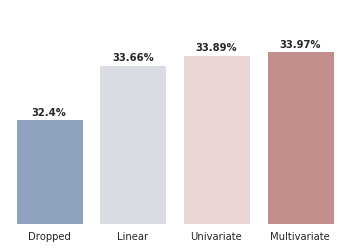

In [ ]:
# Let's chart it too:
import matplotlib.pyplot as plt
import seaborn as sns

x = ['Dropped', 'Linear', 'Univariate', 'Multivariate']
y = [r2_drop, r2_linear, r2_univ, r2_mult]

sns.axes_style('white')
sns.set_style('white')

ax = sns.barplot(x, y, palette="vlag")
ax.set_yticks([])
sns.despine(ax=ax, bottom=True, left=True)
ax.set(ylim=(.30, .35))
for i, r2 in enumerate(y):
  ax.text(i, r2+.001, str(round(r2*100, 4))+'%', ha='center', fontweight='bold')
plt.show()

In [ ]:
import pandas as pd  
import numpy as np
import statsmodels.api as sm
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

def missing_dropped():
  # Create a clean version with all missing values (and unnecessary fields) dropped
  df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
  df.drop(columns=['name', 'type2'], inplace=True) # Let's leave out name because they are all different and leave out type2 because there are missing categorical values
  df.dropna(inplace=True)
  df = df.join(pd.get_dummies(df.type1, prefix='type1', drop_first=True))
  df = df.select_dtypes(np.number)

def missing_pandas_interpolate():
  # Pandas Linear Interpolate
  df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
  df.drop(columns=['name', 'type2'], inplace=True)
  df.weight_kg.interpolate(inplace=True)
  for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]):
      df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))
  df = df.select_dtypes(np.number)

def missing_linear_regression():
  # Univariate Impute
  df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
  df.drop(columns=['name', 'type2'], inplace=True)
  df = missing_data_regression(df)
  for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]):
      df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))
  df = df.select_dtypes(np.number)

def missing_iterativeimputer():
  # Multivariate Impute
  df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
  df.drop(columns=['name', 'type2'], inplace=True)
  for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]):
      df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))
  df = df.select_dtypes(np.number)
  imp = IterativeImputer(max_iter=10, random_state=0)
  df = pd.DataFrame(imp.fit_transform(df), columns=[df.columns], dtype='float')

%timeit missing_dropped()
%timeit missing_pandas_interpolate()
%timeit missing_linear_regression()
%timeit missing_iterativeimputer()

10 loops, best of 3: 164 ms per loop
10 loops, best of 3: 159 ms per loop
10 loops, best of 3: 170 ms per loop
1 loop, best of 3: 330 ms per loop


# **Practice**

---



### Practice #1: Insurance Data

This dataset has a modified version of BMI that includes missing values: http://www.ishelp.info/data/insurance_missing.csv

Use four methods to fill in those missing BMI values and save each version of the "filled in" values as new columns in the dataset:

1.   BMI_mean (mean replacement)
2.   BMI_pandas (interpolate())
3.   BMI_LR (linear regression [univariate])
4.   BMI_II (IterativeImputer)

Generate the mean, standard deviation, and histogram for each version of BMI including the original (non-missing) feature. What do you learn about the differnet missing-data techniques from these results?

What do you learn about the different missing-data techniques from these results? Which one keeps the mean and distribution as similar to the original as possible?

In [ ]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/insurance_missing.csv')
df.isnull().sum()

age            0
sex            0
bmi            0
bmi_missing    8
children       0
smoker         0
region         0
charges        0
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

df_dropped = df['bmi_missing']
df['bmi_mean'] = df['bmi_missing']
df['bmi_pandas'] = df['bmi_missing']
df['bmi_LR'] = df['bmi_missing']
df['bmi_II'] = df['bmi_missing']

df.drop(columns=['bmi'], inplace=True)     # Drop the original or else it will mess up the linear regression function
df = missing_data_regression(df, 'bmi_LR') # Fill in missing values with LR
df.fillna(value={'bmi_mean': round(df.bmi_mean.mean(), 1)}, inplace=True)  # Fill it in with the mean
df.bmi_pandas.interpolate(inplace=True)    # Fill it in with Pandas linear interpolate

# Generate dummy codes and drop the categorical features before we can use the IterativeImputer
for col in df:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))
df = df.select_dtypes(np.number)
imp = IterativeImputer(max_iter=10, random_state=0) # Create InterativeImputer object to fill in
df = pd.DataFrame(imp.fit_transform(df), columns=[df.columns], dtype='float')
df.columns = df.columns.get_level_values(0)         # This get's rid of the extra layer of columns that comes from using name as the index

In [ ]:
print(f'Dropped mean:\t\t {df_dropped.mean()}, \tstd: {df_dropped.std()}')
print(f'Mean-replaced mean:\t {df.bmi_mean.mean()}, \tstd: {df.bmi_mean.std()}')
print(f'Pandas interpolate mean: {df.bmi_pandas.mean()}, \tstd: {df.bmi_pandas.std()}')
print(f'Linear regression mean:\t {df.bmi_LR.mean()}, \tstd: {df.bmi_LR.std()}')
print(f'IterativeImpute mean:\t {df.bmi_II.mean()}, \tstd: {df.bmi_II.std()}')

Dropped mean:		 30.659289473684197, 	std: 6.1100638284410955
Mean-replaced mean:	 30.65953288490283, 	std: 6.091757289026022
Pandas interpolate mean: 30.653247384155442, 	std: 6.1049996492960075
Linear regression mean:	 30.657476713035166, 	std: 6.093048047627622
IterativeImpute mean:	 30.657023536919272, 	std: 6.0937744091397


The mean-replacement kept the mean as close to the original mean as possible--as you would expect. However, it reduced the standard deviation the most and make it further away from the original dropped standard deviation than any other technique.

### Practice #2: Amazon Toys

This dataset has actual toy products listed on Amazon.com. It is full of missing values. Explore the missing values in this dataset and determine why you believe each feature has missing data (i.e. MCAR, MAR, MNAR). Then,:

*  Choose a strategy for handling each feature, either: drop the row, drop the column, replace with mean/median/mode, impute a value

*  Apply the strategy in the order that will keep the as much data as possible that is valid.

*  Calculate an MLR in the statsmodels.api package predicting average_rating

NOTE: Because this data has some weird text characters in it, you will need to read_csv with a broader encoding, use the following: df = pd.read_csv('http://www.ishelp.info/data/amazon_toys.csv', encoding='ISO-8859-1')

In [ ]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/amazon_toys.csv', encoding='ISO-8859-1')
df.isnull().sum()

uniq_id                            0
product_name                       0
manufacturer                       2
usd                                0
number_available_in_stock        523
number_of_reviews                  4
number_of_answered_questions     163
average_rating                     4
category                         131
sub-category                     880
sub-sub-category                1711
sub-sub-category2               1981
dtype: int64

In [ ]:
df.head() 

,uniq_id,product_name,manufacturer,usd,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_rating,category,sub-category,sub-sub-category,sub-sub-category2
0,9d0dca64d9d2c8eaff343242b52d094d,Breaking Bad 6 -inch Jesse Pinkman Bobble Head,Breaking Bad,19.11,12.0,11.0,1.0,4.5,Model Building Kits,Figures,NaN,NaN
1,b6267ebb8eced9524592ff629f18f353,Corgi OM46113B Plaxton Panther Oxford Bus Comp...,Corgi,39.10,5.0,1.0,1.0,5.0,Toy Vehicles & Accessories,Scaled Models,Vehicles,NaN
2,d5307f78d3f6fcf55286e94a175810c2,Novelties Direct Hawaiian Foil Balloon Luau Pa...,Partyrama,2.71,2.0,1.0,1.0,4.0,Decorations,Balloons,NaN,NaN
3,3eb0a428905a094f1419d8aa849da0f5,Konfidence Children Micro Neoprene Top - Blue ...,Konfidence,17.99,NaN,3.0,1.0,5.0,Beach Toys,Flotation Devices & Accessories,NaN,NaN
4,356d9386c939cfe2631696b366ffdab8,Fisher-PriceThomas Wooden Railway - Dash,Fisher-Price,14.99,11.0,1.0,1.0,5.0,Toy Trains & Accessories,Toy Trains & Sets,NaN,NaN


In [ ]:
# Not sure why these are mising. But since they are numeric, I can treat them as the same group 'unknown'
# and any potential bias will be limited to that group. I can't do this with a numeric feature since the
# number will give it an order and also bias the other numeric values
df.manufacturer.fillna('unknown', inplace=True)
df.category.fillna('unknown', inplace=True)

# Knowing that not every product has sub-categories, I'm assuming these products simply don't have one
df['sub-category'].fillna('none', inplace=True)
df['sub-sub-category'].fillna('none', inplace=True)
df.drop(columns=['sub-sub-category2'], inplace=True)

# Looking at the data, I'm guessing these are MNAR and the nulls simply represent zeros
df.number_available_in_stock.fillna(0, inplace=True)
df.number_of_answered_questions.fillna(0, inplace=True)

df.isnull().sum()

uniq_id                         0
product_name                    0
manufacturer                    0
usd                             0
number_available_in_stock       0
number_of_reviews               4
number_of_answered_questions    0
average_rating                  4
category                        0
sub-category                    0
sub-sub-category                0
dtype: int64

In [ ]:
# Those without reviews are the same as those without an average rating. Therefore, I 
# believe both are MNAR. However, we can still predict a value if there are enough other 
# features. Let's give it a try. First, drop uniq_id and product_name since those will 
# not help and have no theoretical reason to affect average_rating
import numpy as np
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
import statsmodels.api as sm

df.drop(columns=['uniq_id', 'product_name', 'manufacturer'], inplace=True)
for col in df:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))
df = df.select_dtypes(np.number)
imp = IterativeImputer(max_iter=10, random_state=0) # Create InterativeImputer object to fill in
df = pd.DataFrame(imp.fit_transform(df), columns=[df.columns], dtype='float')
df.columns = df.columns.get_level_values(0)

y = df['average_rating']
X = df.drop(columns=['average_rating']).assign(const=1)
results = sm.OLS(y, X).fit()
print(results.summary())



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         average_rating   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.391
Date:                Mon, 16 Mar 2020   Prob (F-statistic):            0.00221
Time:                        21:20:44   Log-Likelihood:                -729.10
No. Observations:                2000   AIC:                             1744.
Df Residuals:                    1857   BIC:                             2545.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
usd                                                      0.0004      0.000      1.697      0.090   -6.06e-05       0.001
number_available_in_stock                                0.0018      0.001      1.634      0.102      -0.000       0.004
number_of_reviews                                       -0.0010      0.000     -4.202      0.000      -0.001      -0.001
number_of_answered_questions                            -0.0009      0.003     -0.292      0.770      -0.007       0.005
category_ Accessories                                   -0.0845      0.149     -0.569      0.570      -0.376       0.207
category_ Accessories                                    0.0270      0.042      0.637      0.524      -0.056       0.110
category_ Art Sand                                      -0.2192      0.157     -1.395      0.163      -0.527       0.089
category_ BRIO                                           0.0401      0.177      0.226      0.821      -0.307       0.388
category_ Banners, Stickers & Confetti                   0.1431      0.066      2.179      0.029       0.014       0.272
category_ Barbie                                         0.0959      0.387      0.248      0.804      -0.663       0.855
category_ Beach Toys                                    -0.0244      0.063     -0.388      0.698      -0.148       0.099
category_ Bikes, Trikes & Ride-ons                       0.3445      0.159      2.166      0.030       0.033       0.656
category_ Blackboards                                   -0.1848      0.187     -0.987      0.324      -0.552       0.182
category_ Brain Teasers                                 -0.1619      0.162     -0.997      0.319      -0.480       0.157
category_ Card Games                                    -0.1388      0.146     -0.952      0.341      -0.425       0.147
category_ Casino Equipment                               0.4458      0.136      3.275      0.001       0.179       0.713
category_ Chess                                         -0.0529      0.172     -0.307      0.759      -0.391       0.285
category_ Children's Craft Kits                         -0.0922      0.178     -0.517      0.605      -0.442       0.257
category_ Children's Craft Kits                          0.1035      0.027      3.806      0.000       0.050       0.157
category_ Climbing Frames                               -0.4803      0.290     -1.657      0.098      -1.049       0.088
category_ Collectible Figures & Memorabilia              0.1633      0.059      2.762      0.006       0.047       0.279
category_ Colouring Pencils                              0.1271      0.201      0.631      0.528      -0.268       0.522
category_ Colouring Pens & Markers                      -0

### Practice #3: MCAR or MAR?

How can you test to see whether data are MCAR versus MAR? If they are MCAR, then there should be no significant difference between the distribution of the non-missing data and the missing data. For example, with the pokemon dataset, if the 20 cases that are missing weight_kg have different means across the remaining numeric features than those with weight_kg filled in, then the data are MAR and they should be dropped entirely. Test this by:


*   Create two versions of the dataset: one with no missing values (781 records) and one of just those records missing weight_kg (20 records)

*   Calcualte a t-test to compare each of the numeric features to see if any are significantly different across the two datasets

*   Calculate a Bonferroni correction to make sure you find a significant difference by chance



In [ ]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.drop(columns=['type2'], inplace=True)  # get rid of type2 since it's unnecessary for this problem
df_missing = df[df['weight_kg'].isnull()] # this dataset has the 20 records that are missing weight_kg
print(df_missing.shape)
df_no_missing = df.dropna()               # this dataset has the remaining 781 records that aren't missing weight_kg
print(df_no_missing.shape)
print(df_no_missing.columns)

(20, 9)
(781, 9)
Index(['name', 'type1', 'weight_kg', 'hp', 'attack', 'defense', 'speed',
       'generation', 'is_legendary'],
      dtype='object')


In [ ]:
from scipy import stats

t, p = stats.ttest_ind(df_no_missing.hp, df_missing.hp)
print(f'hp: \t\tt={round(t, 4)}\tp={round(p, 4)}')
t, p = stats.ttest_ind(df_no_missing.attack, df_missing.attack)
print(f'attack: \tt={round(t, 4)}\tp={round(p, 4)}')
t, p = stats.ttest_ind(df_no_missing.defense, df_missing.defense)
print(f'defense: \tt={round(t, 4)}\tp={round(p, 4)}')
t, p = stats.ttest_ind(df_no_missing.speed, df_missing.speed)
print(f'speed: \t\tt={round(t, 4)}\tp={round(p, 4)}')
t, p = stats.ttest_ind(df_no_missing.generation, df_missing.generation)
print(f'generation: \tt={round(t, 4)}\tp={round(p, 4)}')
t, p = stats.ttest_ind(df_no_missing.is_legendary, df_missing.is_legendary)
print(f'is_legendary: \tt={round(t, 4)}\t\tp={round(p, 4)}')
print(f'Bonferroni-corrected p-value: p = 0.05 / 6 t-tests = {round(0.05/6, 4)}')

hp: 		t=1.2631	p=0.2069
attack: 	t=-0.9001	p=0.3683
defense: 	t=-0.0355	p=0.9717
speed: 		t=-0.3391	p=0.7346
generation: 	t=5.0995	p=0.0
is_legendary: 	t=0.599		p=0.5493
Bonferroni-corrected p-value: p = 0.05 / 6 t-tests = 0.0083


After correcting for multiple t-tests, the new cutoff value threshold for "significant difference" was 0.0083. Only one feature--generation--was below that cutoff value. All other features were no different. My guess is that some of the newer generation pokemon simply did not have weight or it wasn't recorded. So let's check to see if the missing pokemon values were all from the same generation or whether all of one generation had missing values.

For the rest of the features, since there was no difference. Therefore, weight_kg is MCAR for all features except for generation,for which, its MAR. I would have no problem using those features to impute a the missing values for weight. But let's check on generation before going any further. Let's sort by generation and then by weight_kg to make this easy to view:

In [ ]:
import pandas as pd
pd.set_option('max_row', 1000)
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.sort_values(by=['weight_kg', 'generation'])

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
91,Gastly,ghost,poison,0.1,30,35,30,80,1,0
92,Haunter,ghost,poison,0.1,45,50,45,95,1,0
668,Flabébé,fairy,NaN,0.1,44,38,39,42,6,0
788,Cosmog,psychic,NaN,0.1,43,29,31,37,7,1
797,Kartana,grass,steel,0.1,59,181,131,109,7,1
741,Cutiefly,bug,fairy,0.2,40,45,40,84,7,0
478,Rotom,electric,ghost,0.3,50,65,107,86,4,0
479,Uxie,psychic,NaN,0.3,75,75,130,95,4,1
480,Mesprit,psychic,NaN,0.3,80,105,105,80,4,1
481,Azelf,psychic,NaN,0.3,75,125,70,115,4,1


If you scroll to the bottom of the bottom, it appears that all missing weight_kg values are in the 1st generation except for two. That looks like a bias. However, if you scroll back to the top, you can see that there are still plenty of Generation 1s that do have a weight_kg value. That tells me that I may be able to still make a valid prediction. In summary, there is not a clear obvious solution here. You could make an argument to impute (like I did above) or simply drop generation or the rows with missing data. You might drop the rows and then build an MLR to predict something and see if weight_kg is a significant feature. If it is, then impute the missing values and include them. If it's not, then who cares? Just drop weight_kg. But also, only 20 records are missing. You could probably drop them without really hurting your model. So take your pick--this is often the case.